In [453]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
training_data = pd.read_parquet('C:/Users/nguye/Downloads/BTCUSDT/')
labels = pd.read_parquet('C:/Users/nguye/Downloads/LABEL_BTCUSDT/')
labels.drop(columns="SYMBOL", inplace=True)
join_data = training_data.join(labels, how='left')
training_data.index = pd.to_datetime(training_data.index, unit='ms')
labels.index = pd.to_datetime(labels.index, unit='ms')


In [454]:
full_data = training_data.join(labels, how='left')
# labeled_data = training_data.join(labels, how='right')
labeled_data = training_data.join(labels)
labeled_data.dropna(inplace=True)

## Calculate R and V of data

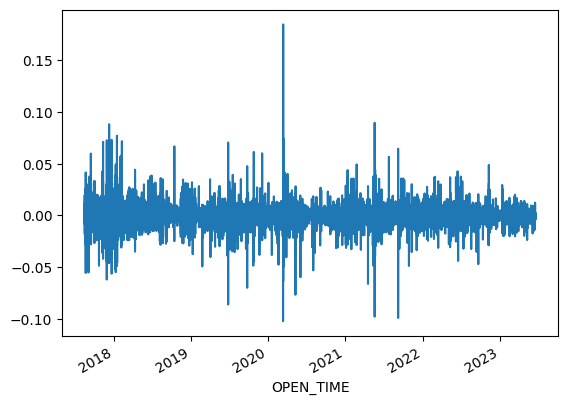

<Axes: xlabel='OPEN_TIME'>

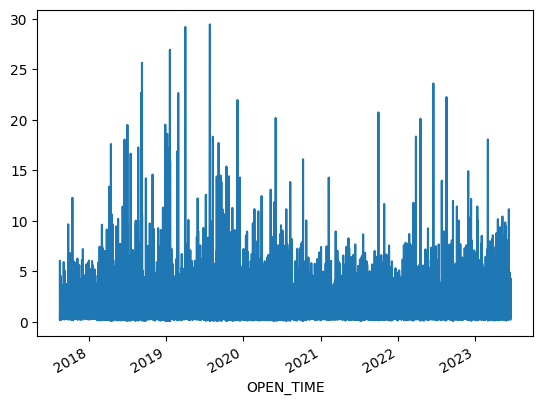

In [455]:
full_data['RETURN_RATE'] = (
    full_data['CLOSE'] - full_data['OPEN']) / full_data['OPEN']

std_backward = full_data['CLOSE'].rolling(19).std()
# rooling backward
std_forward = full_data['CLOSE'].rolling(19).std().shift(-6)
std_ratio = std_forward / std_backward

full_data['V'] = std_ratio

full_data['RETURN_RATE'].plot.line()
plt.show()
full_data['V'].plot.line()


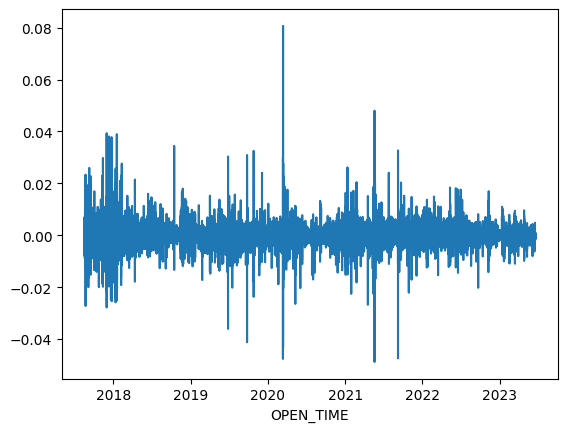

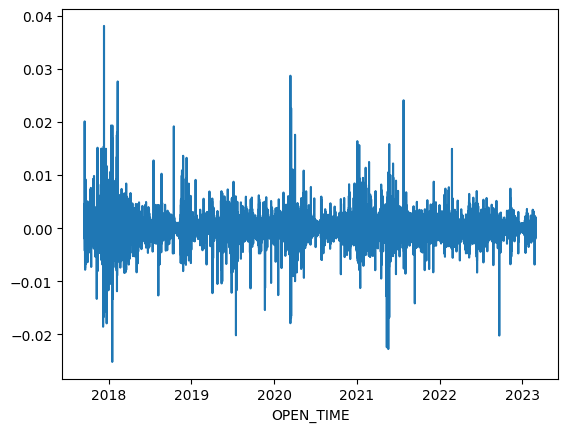

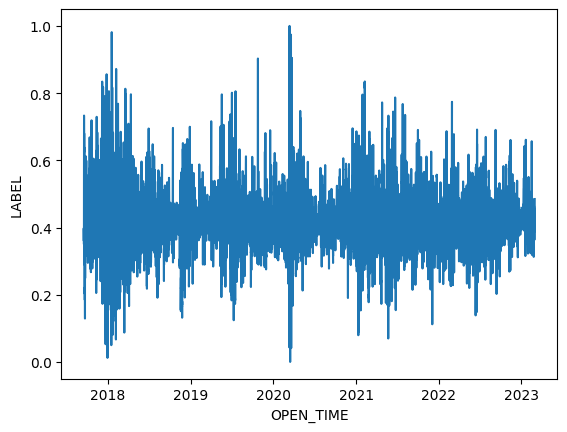

(612386,) (47662,)


In [456]:
y = full_data['RETURN_RATE'] / np.sqrt(full_data['V']) / 2


y_for_label = y.loc[labeled_data.index]
sns.lineplot(data=y)
plt.show()
sns.lineplot(data=y_for_label)
plt.show()
sns.lineplot(data=labeled_data['LABEL'])
plt.show()
print(y.shape, labeled_data['LABEL'].shape)


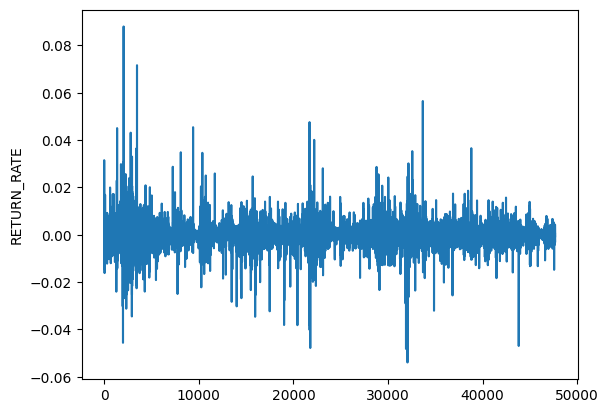

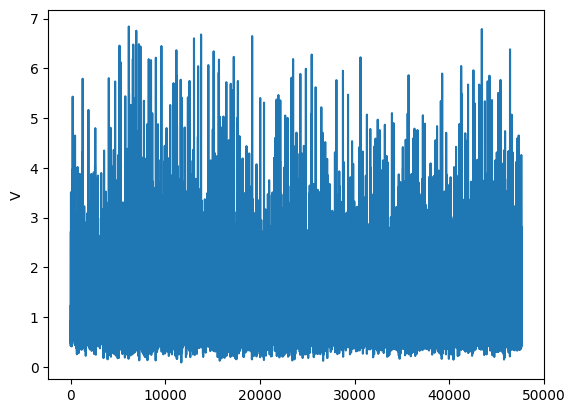

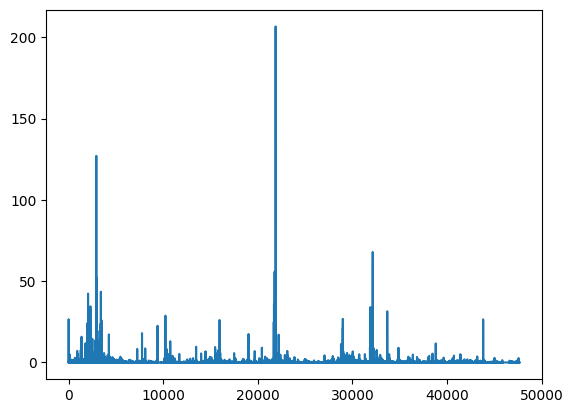

In [457]:
p_bm = (y_for_label**2) / (labeled_data['LABEL']**2)
p_bm[p_bm == np.inf]=0
# sns.lineplot(data=p_bm)
# plt.show()
# sns.lineplot(full_data['V'].loc[labeled_data.index])
# plt.show()
# sns.lineplot(full_data['RETURN_RATE'].loc[labeled_data.index])

X = full_data[['V', 'RETURN_RATE']].loc[labeled_data.index].reset_index(drop=True)
y = p_bm.reset_index(drop=True)*10000
y.describe()
X.describe()
X['RETURN_RATE'][X['RETURN_RATE'] > 4] = 4
X['RETURN_RATE'][X['RETURN_RATE'] < -4] = -3
X['V'][X['V'] > 7] = X['V'].mean()
sns.lineplot(data=X['RETURN_RATE'])
plt.show()
sns.lineplot(data=X['V'])
plt.show()
sns.lineplot(data=y)
plt.show()


In [458]:
y[y>20] =20

In [459]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=10)

# model = RandomForestRegressor(n_estimators=120, random_state=10,verbose=0,max_depth=12)

# model.fit(X_train, y_train)





In [460]:
# # public_test_pred = p_1_3['RETURN_RATE'] / np.sqrt(full_data['V']) / 2
# p_1_3['P_BM'] = test1
# public_test_pred = p_1_3['RETURN_RATE'] / np.sqrt(p_1_3['V']*p_1_3['P_BM']) / 2
# public_test_pred

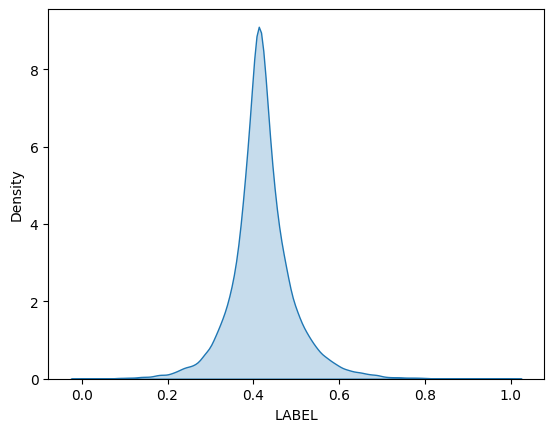

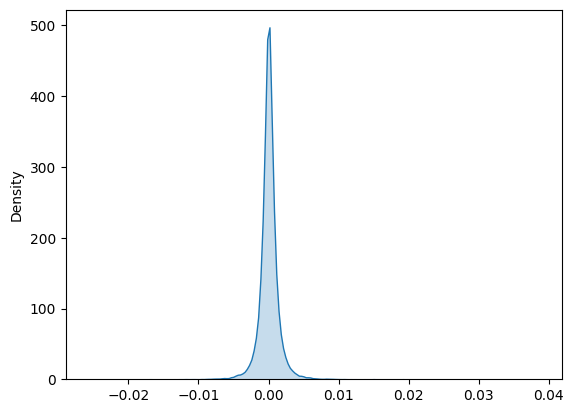

In [461]:
sns.kdeplot(data=labeled_data['LABEL'],fill=True)
# sns.kdeplot(y_for_label,fill=True)
# plt.legend(['LABEL', 'RETURN_RATE'])
# plt.xlim(-1, 1)
plt.show()
sns.kdeplot(y_for_label,fill=True)
plt.show()

In [462]:
labeled_data['LABEL'].describe()

count    47662.000000
mean         0.420557
std          0.074462
min          0.000000
25%          0.385336
50%          0.416168
75%          0.451782
max          1.000000
Name: LABEL, dtype: float64

25% of the data is:  0.38533571428261615
50% of the data is:  0.41616828940095507
75% of the data is:  0.45178177336857694


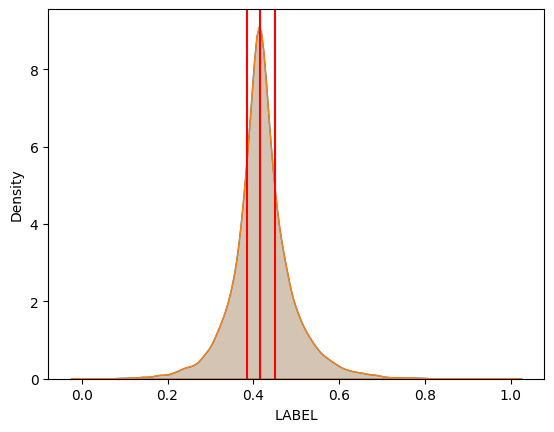

In [463]:
sns.kdeplot(data=labeled_data['LABEL'],fill=True)

print('25% of the data is: ', labeled_data['LABEL'].quantile(0.25))
print('50% of the data is: ', labeled_data['LABEL'].quantile(0.50))
print('75% of the data is: ', labeled_data['LABEL'].quantile(0.75))

# plot this quantile
sns.kdeplot(data=labeled_data['LABEL'],fill=True)
plt.axvline(labeled_data['LABEL'].quantile(0.25), color='red')
plt.axvline(labeled_data['LABEL'].quantile(0.50), color='red')
plt.axvline(labeled_data['LABEL'].quantile(0.75), color='red')
plt.show()


In [464]:
# labels['2017-09-16 10:00:00']
valid_labels_index = labels.index.intersection(training_data.index)
training_data.loc[valid_labels_index].shape


(47662, 10)

# Trainning data

In [465]:
X = full_data.loc[labeled_data.index]
y = X['LABEL']
X.drop(columns=['YEAR_AND_MONTH','LABEL'], inplace=True)
X

,OPEN,HIGH,LOW,CLOSE,VOLUME,QUOTE_ASSET_VOLUME,NUMBER_OF_TRADES,TAKER_BUY_BASE_ASSET_VOLUME,TAKER_BUY_QUOTE_ASSET_VOLUME,RETURN_RATE,V
OPEN_TIME,,,,,,,,,,,
2017-09-16 10:00:00,3753.29,3753.29,3730.00,3730.00,12.426820,4.654148e+04,89,0.028936,1.086052e+02,-0.006205,2.699130
2017-09-16 11:00:00,3490.00,3599.99,3490.00,3599.99,21.729145,7.725914e+04,68,18.714241,6.651942e+04,0.031516,0.613846
2017-09-16 12:00:00,3630.06,3667.99,3630.03,3630.04,3.842747,1.401746e+04,15,2.403627,8.793384e+03,-0.000006,0.419906
2017-09-16 13:00:00,3610.00,3644.97,3610.00,3630.00,2.445122,8.883551e+03,39,1.233507,4.485416e+03,0.005540,1.031010
2017-09-16 14:00:00,3674.98,3727.90,3674.98,3690.00,5.444691,2.010018e+04,92,0.792797,2.950498e+03,0.004087,1.590901
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 19:00:00,23481.63,23492.84,23472.24,23473.37,634.810840,1.490652e+07,27420,298.291320,7.004613e+06,-0.000352,2.809735
2023-02-28 20:00:00,23263.38,23272.46,23167.15,23189.26,2865.914520,6.652689e+07,66824,1252.804130,2.908068e+07,-0.003186,0.802760
2023-02-28 21:00:00,23270.59,23277.98,23192.12,23209.65,1829.575030,4.252433e+07,57949,867.875200,2.017225e+07,-0.002619,2.064099


In [466]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12)
model = RandomForestRegressor(n_estimators=140, random_state=12,verbose=1,max_depth=15,min_samples_leaf=3)

model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  2.0min finished


RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=140,
                      random_state=12, verbose=1)

In [467]:
model.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  2.6min finished


RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=140,
                      random_state=12, verbose=1)

# Predict

In [575]:
# Create a dataframe and resample to hourly data
t = pd.date_range(start='2021-12-31', end='2023-04-03', freq='H')
public_test_train = full_data.resample('H').last().loc[t]

# Drop the columns that are not needed
public_test_train.drop(columns=['YEAR_AND_MONTH','LABEL'], inplace=True)
# Fill the missing values
public_test_train.fillna(method='bfill', inplace=True)

In [576]:
# get full data from 1/1/2023 to 3/1/2023
t = pd.date_range(start='2021-12-31', end='2023-04-03', freq='H')

idx = t.astype(np.int64) // 10**6

idx



Index([1640908800000, 1640912400000, 1640916000000, 1640919600000,
       1640923200000, 1640926800000, 1640930400000, 1640934000000,
       1640937600000, 1640941200000,
       ...
       1680447600000, 1680451200000, 1680454800000, 1680458400000,
       1680462000000, 1680465600000, 1680469200000, 1680472800000,
       1680476400000, 1680480000000],
      dtype='int64', length=10993)

In [577]:
public_test_pred = model.predict(public_test_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.2s finished


In [578]:
public_test= pd.DataFrame({'OPEN_TIME':idx, 'PREDICTION':public_test_pred})
public_test.to_csv('C:/Users/nguye/Downloads/public_test.csv', index=False)

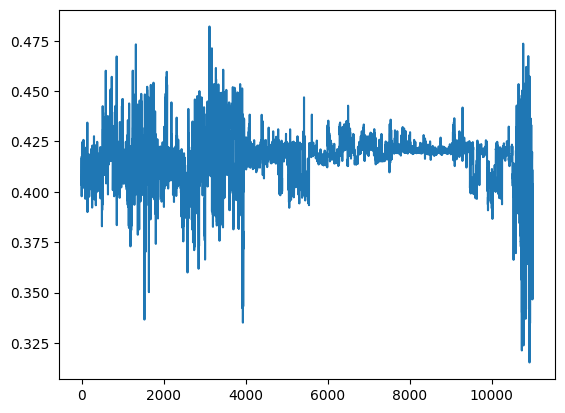

<Axes: ylabel='Density'>

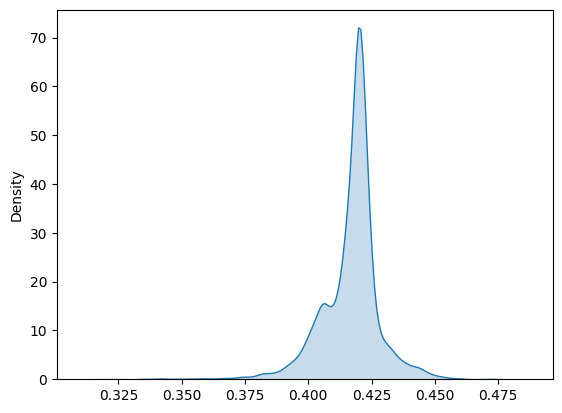

In [579]:
sns.lineplot(data=public_test_pred)
plt.show()
sns.kdeplot(data=public_test_pred,fill=True)